In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn
import sklearn.datasets
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import seed
seed(1)
import tensorflow as tf
import keras

df=pd.read_csv("Resources/Adults_Diabetes_NHANES_2011_2012.csv")
df.head()

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,hdl,grip_strength,fev1_fvc_ratio
0,69220,Gwendolyn,Runolfsson,1,21,7,2.0,6.0,1.0,2,...,54.0,6.0,12.7,36.1,157.0,0.654,5.0,47.0,50.3,0.78
1,63030,Augustus,Farrell,0,21,1,2.0,6.0,3.0,4,...,83.0,6.9,15.1,44.4,226.0,0.221,5.2,40.0,90.1,0.84
2,64051,Aaron,Schmeler,0,21,2,3.0,5.0,4.0,3,...,256.0,8.2,14.4,41.3,266.0,0.011,5.1,38.0,72.7,0.83
3,65141,Bob,Bechtelar,0,21,1,2.0,5.0,4.0,4,...,57.0,6.6,14.7,43.0,206.0,16.300,5.1,55.0,86.6,0.83
4,64632,Hayden,Brekke,0,21,2,3.0,5.0,10.0,2,...,70.0,7.8,15.6,45.1,306.0,212.000,6.0,39.0,94.4,0.83


In [2]:
df_1=df.drop(columns=['first', 'last','drinks_day', 'depression','fev1_fvc_ratio'])
#Remember to Add back SEQN for ETL

df_1.head()


,seqn,gender,age,race,education,marital,income,household_size,insurance,gen_health,...,glob,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,hdl,grip_strength
0,69220,1,21,7,2.0,6.0,1.0,2,1,3.0,...,2.9,54.0,6.0,12.7,36.1,157.0,0.654,5.0,47.0,50.3
1,63030,0,21,1,2.0,6.0,3.0,4,2,3.0,...,2.8,83.0,6.9,15.1,44.4,226.0,0.221,5.2,40.0,90.1
2,64051,0,21,2,3.0,5.0,4.0,3,1,3.0,...,3.0,256.0,8.2,14.4,41.3,266.0,0.011,5.1,38.0,72.7
3,65141,0,21,1,2.0,5.0,4.0,4,1,4.0,...,2.6,57.0,6.6,14.7,43.0,206.0,16.300,5.1,55.0,86.6
4,64632,0,21,2,3.0,5.0,10.0,2,1,2.0,...,2.9,70.0,7.8,15.6,45.1,306.0,212.000,6.0,39.0,94.4


In [3]:
len(df_1)

5206

In [4]:
df1=df_1.dropna()
len(df1)

3260

In [5]:
#BMI 
#0= BMI less than 25
#1= BMI less than 30 and BMI great than 24
#2=BMI great than 30

conditions = [
   df1['bmi'] <25,
    (df1['bmi'] >=25) & (df1['bmi'] <30),
   df1['bmi'] >=30
]
choices = [0,1, 2]
df1['bmi_group'] = np.select(conditions, choices, default=1)

#df1['bmi_group'] = 1
#df1.loc[df1['bmi'] >=30,'bmi_group'] = 2
#df1.loc[df1['bmi'] <24,'bmi_group']= 0

df1[["bmi","bmi_group"]].sample(50)

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,bmi,bmi_group
1599,32.1,2
2552,30.6,2
424,26.3,1
2356,37.1,2
2810,33.6,2
1817,24.4,0
2596,30.6,2
2750,29.3,1
1350,27.9,1
4720,30.2,2


In [6]:
#Age Group 

# 0=  0-20
# 1=  21-30
# 2=  31-45
# 3=  46-65
# 4=  65+
conditions1 = [
    (df1['age'] >20)&(df1['age'] <31),
    (df1['age'] >30)&(df1['age'] <46),
    (df1['age'] >45)&(df1['age'] <66),
    df1['age'] >65
]
choices1 = [1, 2, 3,4]
df1['age_group'] = np.select(conditions1, choices1, default=0)


#df1['age_group'] = 0
#df1.loc[(df1['age'] >20)&(df1['age'] <31),'age_group'] = 1
#df1.loc[(df1['age'] >30)&(df1['age'] <46),'age_group']= 2
#df1.loc[(df1['age'] >45)&(df1['age'] <66),'age_group'] = 3
#df1.loc[df1['age'] >65,'age_group'] = 4

df1[["age","age_group"]].sample(50)

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,age,age_group
3068,54,3
4656,74,4
1061,32,2
882,30,1
4624,74,4
3061,54,3
1827,40,2
3541,60,3
3531,60,3
525,26,1


In [7]:
#Blood Pressure Group 
#Systolic Blood Pressure less than 120 and Diastolic Blood Pressure of less than 80
#Systolic Blood Pressure between 120 and 129 and Diastolic Blood Pressure of less than 80
#Systolic Blood Pressure greater than 130 or  Diastolic Blood Pressure of greater than 80

conditions2 = [
    (df1['sys_bp'] <120)&(df1['dia_bp'] <80),
   (df1['sys_bp'] >119)&(df1['sys_bp'] <=129)&(df1['dia_bp'] <80),
    (df1['sys_bp'] >129)|(df1['dia_bp'] >=80),
 
]
choices2 = [0, 1, 2]
df1['bp_group'] = np.select(conditions2, choices2, default=0)
#df1['bp_group'] = 0
#df1.loc[(df['sys_bp'] <120)&(df1['dia_bp'] <80),'bp_group'] = 0
#df1.loc[(df['sys_bp'] >119)&(df1['sys_bp'] <=129)&(df['dia_bp'] <80),'bp_group'] = 1
#df1.loc[(df['sys_bp'] >129)|(df1['dia_bp'] >=80),'bp_group'] = 2


df1[["sys_bp","dia_bp","bp_group"]].sample(50)


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,sys_bp,dia_bp,bp_group
292,120.0,70.0,1
62,116.0,80.0,2
4386,114.0,50.0,0
1147,120.0,84.0,2
4378,116.0,52.0,0
4912,190.0,70.0,2
3035,144.0,66.0,2
4329,154.0,78.0,2
116,134.0,46.0,2
4851,156.0,76.0,2


In [8]:
df2=df1.drop(columns=['seqn'])

In [9]:
df2["diabetes"]= df2["diabetes"]-1

target = df2["diabetes"]
target_names = [0,1,2]

In [10]:
data = df2.drop("diabetes", axis=1) 
feature_names = data.columns 
data.head()

,gender,age,race,education,marital,income,household_size,insurance,gen_health,asthma,...,hgb,hct,platelets,s_cotinine,a1c,hdl,grip_strength,bmi_group,age_group,bp_group
0,1,21,7,2.0,6.0,1.0,2,1,3.0,2.0,...,12.7,36.1,157.0,0.654,5.0,47.0,50.3,0,1,0
1,0,21,1,2.0,6.0,3.0,4,2,3.0,1.0,...,15.1,44.4,226.0,0.221,5.2,40.0,90.1,1,1,0
2,0,21,2,3.0,5.0,4.0,3,1,3.0,2.0,...,14.4,41.3,266.0,0.011,5.1,38.0,72.7,1,1,0
3,0,21,1,2.0,5.0,4.0,4,1,4.0,2.0,...,14.7,43.0,206.0,16.300,5.1,55.0,86.6,0,1,0
4,0,21,2,3.0,5.0,10.0,2,1,2.0,2.0,...,15.6,45.1,306.0,212.000,6.0,39.0,94.4,2,1,2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, shuffle=True)

In [12]:
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.8503067484662576

In [13]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=75) 
rf = rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.9226993865030675

In [14]:
feature_imp=sorted(zip(rf.feature_importances_, feature_names), reverse=True)

feature_imp[1][0].dtype

dtype('float64')

In [15]:
remlist=['age', 'bmi','height_cm','waist_cm','weight_kg','dia_bp','sys_bp']
feats= []

for x in feature_imp: 
    if x[0]>0.01 and x[1] not in remlist:
        feats.append(x[1])
        


feats        



['a1c',
 'glucose',
 'alb_cr_ratio',
 't_chol',
 'trigs',
 'platelets',
 'grip_strength',
 'ldh',
 'cr',
 'alk_phos',
 'wbc',
 'potassium',
 'alt',
 'hct',
 'bun',
 'ca',
 'u_acid',
 'cpk',
 'sodium',
 'hdl',
 'hgb',
 'glob',
 'ast',
 't_protein',
 'iron',
 'hypertension',
 'gen_health',
 'phos',
 's_cotinine',
 'chloride',
 't_bilirubin']

In [16]:
group_list=["bmi_group", "age_group", "bp_group","diabetes"]

for x in group_list: 
    if x not in feats: 
        feats.append(x)
        
feats

['a1c',
 'glucose',
 'alb_cr_ratio',
 't_chol',
 'trigs',
 'platelets',
 'grip_strength',
 'ldh',
 'cr',
 'alk_phos',
 'wbc',
 'potassium',
 'alt',
 'hct',
 'bun',
 'ca',
 'u_acid',
 'cpk',
 'sodium',
 'hdl',
 'hgb',
 'glob',
 'ast',
 't_protein',
 'iron',
 'hypertension',
 'gen_health',
 'phos',
 's_cotinine',
 'chloride',
 't_bilirubin',
 'bmi_group',
 'age_group',
 'bp_group',
 'diabetes']

In [17]:
diab_df =df2[feats]

In [18]:
diab_df

,a1c,glucose,alb_cr_ratio,t_chol,trigs,platelets,grip_strength,ldh,cr,alk_phos,...,hypertension,gen_health,phos,s_cotinine,chloride,t_bilirubin,bmi_group,age_group,bp_group,diabetes
0,5.0,82.0,11.77,118.0,54.0,157.0,50.3,75.0,0.44,44.0,...,2.0,3.0,4.2,0.654,105.0,0.8,0,1,0,1.0
1,5.2,81.0,2.37,172.0,83.0,226.0,90.1,137.0,0.81,112.0,...,2.0,3.0,3.8,0.221,102.0,1.2,1,1,0,1.0
2,5.1,87.0,3.73,168.0,256.0,266.0,72.7,112.0,0.82,103.0,...,2.0,3.0,4.4,0.011,104.0,0.4,1,1,0,1.0
3,5.1,91.0,3.74,144.0,57.0,206.0,86.6,87.0,0.73,65.0,...,2.0,4.0,4.2,16.300,102.0,0.9,0,1,0,1.0
4,6.0,89.0,3.13,104.0,70.0,306.0,94.4,104.0,1.07,55.0,...,2.0,2.0,4.3,212.000,104.0,0.8,2,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,5.8,98.0,49.63,185.0,80.0,178.0,47.2,127.0,0.55,42.0,...,1.0,3.0,3.7,0.011,103.0,0.9,0,4,2,1.0
5197,6.0,100.0,9.40,166.0,105.0,189.0,75.6,163.0,1.15,49.0,...,2.0,3.0,3.0,0.011,105.0,1.0,1,4,2,1.0
5199,7.0,175.0,187.41,176.0,104.0,273.0,33.1,155.0,0.92,84.0,...,1.0,3.0,3.9,0.011,102.0,0.5,2,4,2,0.0
5201,6.5,126.0,11.43,171.0,130.0,205.0,65.2,119.0,0.73,50.0,...,2.0,2.0,3.1,0.269,107.0,0.7,2,4,2,0.0


In [19]:
data = diab_df.drop("diabetes", axis=1) 
feature_names = data.columns 
data.head()

,a1c,glucose,alb_cr_ratio,t_chol,trigs,platelets,grip_strength,ldh,cr,alk_phos,...,iron,hypertension,gen_health,phos,s_cotinine,chloride,t_bilirubin,bmi_group,age_group,bp_group
0,5.0,82.0,11.77,118.0,54.0,157.0,50.3,75.0,0.44,44.0,...,165.0,2.0,3.0,4.2,0.654,105.0,0.8,0,1,0
1,5.2,81.0,2.37,172.0,83.0,226.0,90.1,137.0,0.81,112.0,...,119.0,2.0,3.0,3.8,0.221,102.0,1.2,1,1,0
2,5.1,87.0,3.73,168.0,256.0,266.0,72.7,112.0,0.82,103.0,...,68.0,2.0,3.0,4.4,0.011,104.0,0.4,1,1,0
3,5.1,91.0,3.74,144.0,57.0,206.0,86.6,87.0,0.73,65.0,...,63.0,2.0,4.0,4.2,16.300,102.0,0.9,0,1,0
4,6.0,89.0,3.13,104.0,70.0,306.0,94.4,104.0,1.07,55.0,...,121.0,2.0,2.0,4.3,212.000,104.0,0.8,2,1,2


In [20]:
target = diab_df["diabetes"].values.reshape(-1, 1)
target_names = [1,2,3]

In [21]:
numb_variables =len(feature_names.tolist())
print(f"The total number of variables is: {numb_variables}") 

The total number of variables is: 34


In [22]:
###MY CODE STARTS HERE

In [23]:
#MULLTIPLE LINEAR REGRESSION

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, shuffle=True)

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

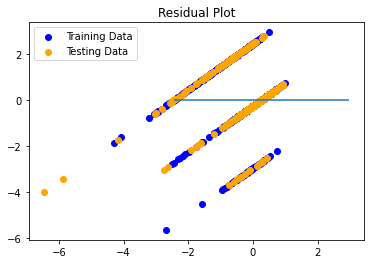

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6689199878963539, R2: 0.28500183491349296


In [28]:
#Decision Trees

In [29]:
clf = tree.DecisionTreeClassifier() #model
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8601226993865031

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9251533742331288

In [31]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2171244923073894, 'a1c'),
 (0.14159017464662857, 'glucose'),
 (0.04033563916099368, 'alb_cr_ratio'),
 (0.027941550329338944, 't_chol'),
 (0.026653750273326317, 'platelets'),
 (0.02624347887169418, 'trigs'),
 (0.025297052120388457, 'ldh'),
 (0.02506681162018428, 'cr'),
 (0.02384038065560702, 'potassium'),
 (0.023437831286603792, 'grip_strength'),
 (0.023077049011410763, 'u_acid'),
 (0.023000820344757207, 'alk_phos'),
 (0.022390625834976207, 'cpk'),
 (0.021553008392466353, 'hdl'),
 (0.021350570647872612, 'bun'),
 (0.02045068040367984, 'wbc'),
 (0.019422131241907767, 'alt'),
 (0.019293107139802312, 'hct'),
 (0.01919948459506571, 'ast'),
 (0.018989805747332028, 'ca'),
 (0.018607723760869027, 'chloride'),
 (0.018179912827706878, 'gen_health'),
 (0.01795007565832322, 't_protein'),
 (0.017857817995464993, 'glob'),
 (0.01763448577599942, 'iron'),
 (0.017425142103149462, 'hgb'),
 (0.01688265752120986, 'phos'),
 (0.016817490750511317, 's_cotinine'),
 (0.016776521921147675, 'sodium'),
 (0.015

In [32]:
#KNN

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 1.000/0.845


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.915/0.892


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.901/0.896


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.896/0.893


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.894/0.894


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.892/0.893


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.892/0.892


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.889/0.893


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.889/0.891


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.887/0.890


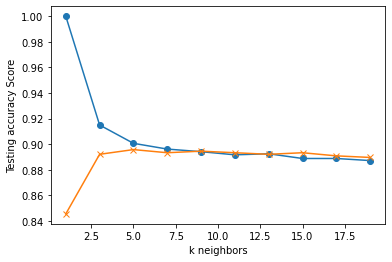

In [33]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=11 Test Acc: 0.893


#SVM

In [35]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [36]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [37]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.910, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.928, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.898, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.910, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.910, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0005, score=0.910, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0005, score=0.928, total=   0.7s
[CV] C=1, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0005, score=0.898, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0005, score=0.910, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0005, score=0.910, total=   0.2s
[CV] C=1, gamma=0.001 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.910, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.928, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.898, total=   0.3s
[CV] C=1, gamma=0.001 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.910, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.910, total=   0.2s
[CV] C=1, gamma=0.005 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.005, score=0.910, total=   0.4s
[CV] C=1, gamma=0.005 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.005, score=0.928, total=   0.3s
[CV] C=1, gamma=0.005 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.005, score=0.898, total=   0.6s
[CV] C=1, gamma=0.005 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.005, score=0.910, total=   0.5s
[CV] C=1, gamma=0.005 ................................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.005, score=0.910, total=   0.2s
[CV] C=5, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0001, score=0.910, total=   1.6s
[CV] C=5, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0001, score=0.928, total=   3.1s
[CV] C=5, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0001, score=0.898, total=   1.5s
[CV] C=5, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0001, score=0.912, total=   2.1s
[CV] C=5, gamma=0.0001 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0001, score=0.910, total=   1.5s
[CV] C=5, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0005, score=0.910, total=   0.9s
[CV] C=5, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0005, score=0.928, total=   2.0s
[CV] C=5, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0005, score=0.898, total=   1.1s
[CV] C=5, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=5, gamma=0.0005, score=0.912, total=   1.7s
[CV] C=5, gamma=0.0005 ...............................................


/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [ ]:
 # List the best parameters for this dataset
print(grid.best_params_)

In [ ]:
# List the best score
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["one", "two","three"]))

In [ ]:
#new_data = [[new data inserted here]]
#predicted_class = knn.predict(new_data)
#print(predicted_class)

In [ ]:
#DEEPLEARNING

In [38]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [39]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=34))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=20, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))

In [42]:
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [43]:
print(y_train_categorical.shape)
print("_----------")
print(X_train_scaled.shape)

(2445, 3)
_----------
(2445, 34)


In [44]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
77/77 - 0s - loss: 0.7378 - accuracy: 0.8356
Epoch 2/200
77/77 - 0s - loss: 0.4518 - accuracy: 0.8585
Epoch 3/200
77/77 - 0s - loss: 0.3631 - accuracy: 0.8851
Epoch 4/200
77/77 - 0s - loss: 0.3235 - accuracy: 0.8990
Epoch 5/200
77/77 - 0s - loss: 0.3007 - accuracy: 0.9080
Epoch 6/200
77/77 - 0s - loss: 0.2880 - accuracy: 0.9133
Epoch 7/200
77/77 - 0s - loss: 0.2788 - accuracy: 0.9162
Epoch 8/200
77/77 - 0s - loss: 0.2706 - accuracy: 0.9166
Epoch 9/200
77/77 - 0s - loss: 0.2633 - accuracy: 0.9190
Epoch 10/200
77/77 - 0s - loss: 0.2574 - accuracy: 0.9186
Epoch 11/200
77/77 - 0s - loss: 0.2515 - accuracy: 0.9215
Epoch 12/200
77/77 - 0s - loss: 0.2469 - accuracy: 0.9198
Epoch 13/200
77/77 - 0s - loss: 0.2415 - accuracy: 0.9260
Epoch 14/200
77/77 - 0s - loss: 0.2377 - accuracy: 0.9239
Epoch 15/200
77/77 - 0s - loss: 0.2329 - accuracy: 0.9272
Epoch 16/200
77/77 - 0s - loss: 0.2291 - accuracy: 0.9276
Epoch 17/200
77/77 - 0s - loss: 0.2256 - accuracy: 0.9301
Epoch 18/200
77/77 - 0s

Epoch 142/200
77/77 - 0s - loss: 0.0209 - accuracy: 0.9930
Epoch 143/200
77/77 - 0s - loss: 0.0629 - accuracy: 0.9832
Epoch 144/200
77/77 - 0s - loss: 0.0418 - accuracy: 0.9869
Epoch 145/200
77/77 - 0s - loss: 0.0272 - accuracy: 0.9914
Epoch 146/200
77/77 - 0s - loss: 0.0193 - accuracy: 0.9947
Epoch 147/200
77/77 - 0s - loss: 0.0168 - accuracy: 0.9955
Epoch 148/200
77/77 - 0s - loss: 0.0157 - accuracy: 0.9963
Epoch 149/200
77/77 - 0s - loss: 0.0144 - accuracy: 0.9971
Epoch 150/200
77/77 - 0s - loss: 0.0141 - accuracy: 0.9975
Epoch 151/200
77/77 - 0s - loss: 0.0135 - accuracy: 0.9980
Epoch 152/200
77/77 - 0s - loss: 0.0133 - accuracy: 0.9980
Epoch 153/200
77/77 - 0s - loss: 0.0126 - accuracy: 0.9984
Epoch 154/200
77/77 - 0s - loss: 0.0122 - accuracy: 0.9984
Epoch 155/200
77/77 - 0s - loss: 0.0122 - accuracy: 0.9984
Epoch 156/200
77/77 - 0s - loss: 0.0116 - accuracy: 0.9988
Epoch 157/200
77/77 - 0s - loss: 0.0111 - accuracy: 0.9984
Epoch 158/200
77/77 - 0s - loss: 0.0109 - accuracy: 0.99

In [45]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 1.8739 - accuracy: 0.8663
Deep Neural Network - Loss: 1.8738971948623657, Accuracy: 0.8662576675415039


In [ ]:
#Acuracy 0.87
#Precision


In [46]:
predictions = deep_model.predict(X_test)
                            
                            

In [47]:
from numpy import argmax

predictions_categorical = predictions.astype(int)

predictions = np.argmax(predictions_categorical, axis=-1)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [48]:
labels = y_test
labels = labels.ravel()
labels

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 2., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [49]:
print(labels.shape)
print(predictions.shape)

(815,)
(815,)


In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
precision

In [ ]:
recall

In [ ]:
cm

In [ ]:
print(np.mean(recall))
print(np.mean(precision))

In [51]:
from sklearn.metrics import classification_report
y_true = labels
y_pred = predictions
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
        

              precision    recall  f1-score   support

     class 0       0.60      0.15      0.24        99
     class 1       0.88      0.99      0.93       702
     class 2       0.00      0.00      0.00        14

    accuracy                           0.87       815
   macro avg       0.49      0.38      0.39       815
weighted avg       0.83      0.87      0.83       815



/Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#DROP CLASS 3

In [53]:
diab_df2 = diab_df[diab_df.diabetes != 2.0]
diab_df2

,a1c,glucose,alb_cr_ratio,t_chol,trigs,platelets,grip_strength,ldh,cr,alk_phos,...,hypertension,gen_health,phos,s_cotinine,chloride,t_bilirubin,bmi_group,age_group,bp_group,diabetes
0,5.0,82.0,11.77,118.0,54.0,157.0,50.3,75.0,0.44,44.0,...,2.0,3.0,4.2,0.654,105.0,0.8,0,1,0,1.0
1,5.2,81.0,2.37,172.0,83.0,226.0,90.1,137.0,0.81,112.0,...,2.0,3.0,3.8,0.221,102.0,1.2,1,1,0,1.0
2,5.1,87.0,3.73,168.0,256.0,266.0,72.7,112.0,0.82,103.0,...,2.0,3.0,4.4,0.011,104.0,0.4,1,1,0,1.0
3,5.1,91.0,3.74,144.0,57.0,206.0,86.6,87.0,0.73,65.0,...,2.0,4.0,4.2,16.300,102.0,0.9,0,1,0,1.0
4,6.0,89.0,3.13,104.0,70.0,306.0,94.4,104.0,1.07,55.0,...,2.0,2.0,4.3,212.000,104.0,0.8,2,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,5.8,98.0,49.63,185.0,80.0,178.0,47.2,127.0,0.55,42.0,...,1.0,3.0,3.7,0.011,103.0,0.9,0,4,2,1.0
5197,6.0,100.0,9.40,166.0,105.0,189.0,75.6,163.0,1.15,49.0,...,2.0,3.0,3.0,0.011,105.0,1.0,1,4,2,1.0
5199,7.0,175.0,187.41,176.0,104.0,273.0,33.1,155.0,0.92,84.0,...,1.0,3.0,3.9,0.011,102.0,0.5,2,4,2,0.0
5201,6.5,126.0,11.43,171.0,130.0,205.0,65.2,119.0,0.73,50.0,...,2.0,2.0,3.1,0.269,107.0,0.7,2,4,2,0.0


In [54]:
diab_df4 = diab_df2.copy()

In [55]:
#Convert DIAABETES VALUES 0->1 AND 1->0

diab_df4['diabetes'] = diab_df4['diabetes'].replace([0,1],[1,0])
diab_df4['diabetes'].value_counts()

0.0    2792
1.0     390
Name: diabetes, dtype: int64

In [56]:
data4 = diab_df4.drop("diabetes", axis=1) 
feature_names4 = data4.columns

In [57]:
target4 = diab_df4["diabetes"].values.reshape(-1, 1)
target_names4 = [1,2]

In [58]:
numb_variables =len(feature_names.tolist())
print(f"The total number of variables is: {numb_variables}") 

The total number of variables is: 34


In [60]:
X_train, X_test, y_train, y_test = train_test_split(data4, target4, random_state=42, shuffle=True)

In [61]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_test, y_test = oversample.fit_resample(X_test, y_test)

y_test = y_test.reshape(-1, 1)

print(X_test.shape)
print(y_test.shape)


(1432, 34)
(1432, 1)


In [62]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
#DEEPLEARNING
#y_predict = model.predict(X_test) 
#y_predict = (y_predict>0.25) # It will evaluate the logical expression y_predict>0.25 and return True or False

In [63]:
X_scaler = StandardScaler().fit(X_train)

In [64]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [91]:
tf.keras.metrics.Recall()

In [233]:


deep_model = Sequential()
deep_model.add(Dense(units=102, activation='relu', input_dim=34))
deep_model.add(Dense(units=68, activation='relu'))
deep_model.add(Dense(units=68, activation='relu'))
deep_model.add(Dense(units=68, activation='relu'))
deep_model.add(Dense(units=68, activation='relu'))

deep_model.add(Dense(units=2, activation='softmax'))

In [234]:
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=["Recall"] )

In [235]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=275,
    shuffle=True,
    verbose=2,
    workers=10, 
    batch_size =32
)

Epoch 1/275
75/75 - 0s - loss: 0.3339 - recall: 0.8726
Epoch 2/275
75/75 - 0s - loss: 0.2058 - recall: 0.9329
Epoch 3/275
75/75 - 0s - loss: 0.1749 - recall: 0.9363
Epoch 4/275
75/75 - 0s - loss: 0.1456 - recall: 0.9489
Epoch 5/275
75/75 - 0s - loss: 0.1293 - recall: 0.9535
Epoch 6/275
75/75 - 0s - loss: 0.1013 - recall: 0.9648
Epoch 7/275
75/75 - 0s - loss: 0.0780 - recall: 0.9753
Epoch 8/275
75/75 - 0s - loss: 0.0641 - recall: 0.9761
Epoch 9/275
75/75 - 0s - loss: 0.0502 - recall: 0.9807
Epoch 10/275
75/75 - 0s - loss: 0.0308 - recall: 0.9883
Epoch 11/275
75/75 - 0s - loss: 0.0233 - recall: 0.9920
Epoch 12/275
75/75 - 0s - loss: 0.0534 - recall: 0.9841
Epoch 13/275
75/75 - 0s - loss: 0.0379 - recall: 0.9904
Epoch 14/275
75/75 - 0s - loss: 0.0263 - recall: 0.9950
Epoch 15/275
75/75 - 0s - loss: 0.0072 - recall: 0.9992
Epoch 16/275
75/75 - 0s - loss: 0.0017 - recall: 1.0000
Epoch 17/275
75/75 - 0s - loss: 6.6578e-04 - recall: 1.0000
Epoch 18/275
75/75 - 0s - loss: 3.9936e-04 - recall: 

Epoch 138/275
75/75 - 0s - loss: 9.4441e-08 - recall: 1.0000
Epoch 139/275
75/75 - 0s - loss: 8.9919e-08 - recall: 1.0000
Epoch 140/275
75/75 - 0s - loss: 8.5985e-08 - recall: 1.0000
Epoch 141/275
75/75 - 0s - loss: 8.1963e-08 - recall: 1.0000
Epoch 142/275
75/75 - 0s - loss: 7.8553e-08 - recall: 1.0000
Epoch 143/275
75/75 - 0s - loss: 7.4668e-08 - recall: 1.0000
Epoch 144/275
75/75 - 0s - loss: 7.1283e-08 - recall: 1.0000
Epoch 145/275
75/75 - 0s - loss: 6.7886e-08 - recall: 1.0000
Epoch 146/275
75/75 - 0s - loss: 6.4701e-08 - recall: 1.0000
Epoch 147/275
75/75 - 0s - loss: 6.1741e-08 - recall: 1.0000
Epoch 148/275
75/75 - 0s - loss: 5.8868e-08 - recall: 1.0000
Epoch 149/275
75/75 - 0s - loss: 5.5758e-08 - recall: 1.0000
Epoch 150/275
75/75 - 0s - loss: 5.3297e-08 - recall: 1.0000
Epoch 151/275
75/75 - 0s - loss: 5.0799e-08 - recall: 1.0000
Epoch 152/275
75/75 - 0s - loss: 4.8376e-08 - recall: 1.0000
Epoch 153/275
75/75 - 0s - loss: 4.6015e-08 - recall: 1.0000
Epoch 154/275
75/75 - 0s

Epoch 273/275
75/75 - 0s - loss: 1.2490e-11 - recall: 1.0000
Epoch 274/275
75/75 - 0s - loss: 1.2490e-11 - recall: 1.0000
Epoch 275/275
75/75 - 0s - loss: 0.0000e+00 - recall: 1.0000


In [236]:
deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

45/45 - 0s - loss: 2.4889 - recall: 0.8073


[2.48885178565979, 0.8072625994682312]

In [237]:
model_loss, model_recall = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss},  Recall: {model_recall} ")

45/45 - 0s - loss: 2.4889 - recall: 0.8073
Deep Neural Network - Loss: 2.48885178565979,  Recall: 0.8072625994682312 


In [246]:
#predictions = deep_model.predict(X_test)
#predictions_categorical = predictions.astype(int)
#predictions = np.argmax(predictions_categorical, axis=-1)

predictions = deep_model.predict(X_test) 
predictions = (predictions>0.25) # It will evaluate the logical expression y_predict>0.25 and return True or False
predictions_categorical = predictions.astype(int)
predictions = np.argmax(predictions_categorical, axis=-1)


In [247]:
labels = y_test
labels = labels.ravel()

In [248]:
from sklearn.metrics import classification_report
y_true = labels
y_pred = predictions
target_names = ["No Diabetes", "Has Diabetes"]
print(classification_report(y_true, y_pred, target_names=target_names))
        

              precision    recall  f1-score   support

 No Diabetes       0.54      0.89      0.67       716
Has Diabetes       0.69      0.26      0.37       716

    accuracy                           0.57      1432
   macro avg       0.62      0.57      0.52      1432
weighted avg       0.62      0.57      0.52      1432



In [ ]:
#SVM


In [ ]:
diab_df3 = diab_df2.copy()

In [ ]:
#Convert DIAABETES VALUES 0->1 AND 1->0

diab_df3['diabetes'] = diab_df3['diabetes'].replace([0,1],[1,0])
diab_df3['diabetes'].value_counts()

In [ ]:
data3 = diab_df3.drop("diabetes", axis=1) 
feature_names3 = data3.columns

In [ ]:
target3 = diab_df3["diabetes"].values.reshape(-1, 1)
target_names3 = [1,2]

In [ ]:
print(data3.shape)
print(target3.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data3, target3, random_state=42, shuffle=True)

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel = 'linear')

In [ ]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50, 75, 100],
             # 'kernel':["linear", "rbf","poly"],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]}
grid = GridSearchCV(model, param_grid, verbose=3, scoring = 'recall')

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_score_)

In [ ]:
predictions = grid.predict(X_test_scaled)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["No Diabetes", "Has Diabetes"]))